In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
il1 = np.triu_indices(4,1)
print(il1)

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))


# ICA

In [ ]:
H:\Matlab\Work\Age\Gift_FCM\ICA\staticFC\stat\avgFC

# FCM

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


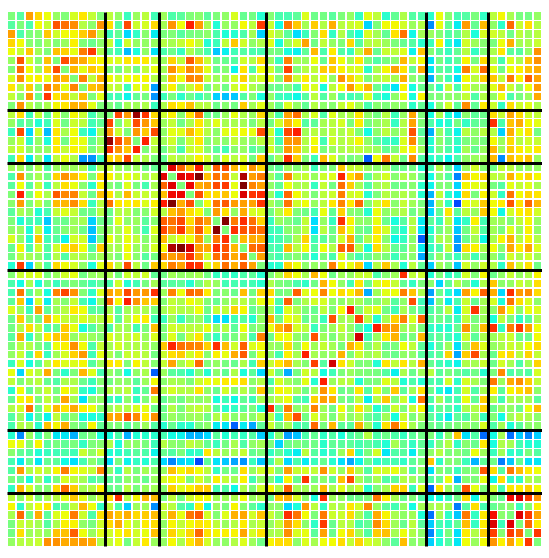

In [91]:
fcm  = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\staticFC\stat\avgFC\avgAll.txt')
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(fcm, cmap=jet, vmax=0.65,vmin=-0.65, center=0,
            square = True,linewidths=.5,cbar =False, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.hlines([11,17,29,47,54], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([11,17,29,47,54], *ax.get_xlim(), colors='black', linewidth=3)

myfig = heatmap.get_figure()
myfig.savefig("ICA100_all_avg_SFC_withoutbar.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

## FNC

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


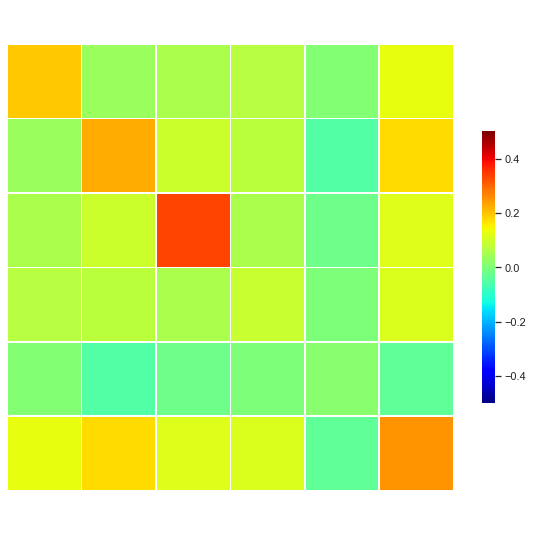

In [24]:
fcm  = np.loadtxt(r'H:\Matlab\Work\Age\ICA\Maconca\fnc_stats\Domin_avg.txt')
# fcm  = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\staticFC\stat\avgFNC\E_Avg.txt')
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(fcm, cmap=jet, vmax=0.5,vmin=-0.5, center=0,
            square = True,linewidths=.5,cbar =True, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
# ax.hlines([11,17,29,47,54], *ax.get_xlim(), colors='black', linewidth=3)
# ax.vlines([11,17,29,47,54], *ax.get_xlim(), colors='black', linewidth=3)

myfig = heatmap.get_figure()
myfig.savefig("ICA100_old_avg_SFNC.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

# FC difference

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


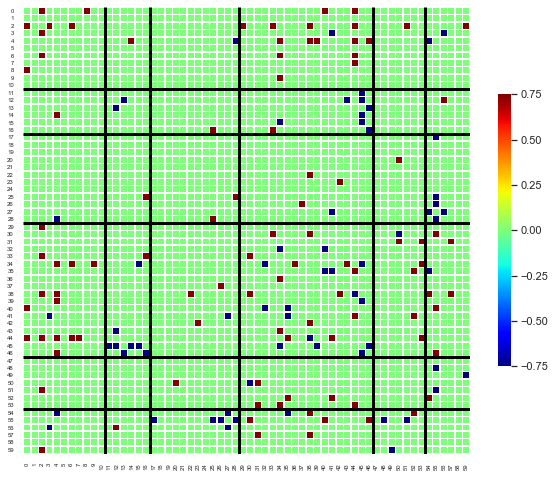

In [101]:
fcm_diff= loadmat(r'H:\Matlab\Work\Age\Gift_FCM\ICA\staticFC\stat\cnnFC\S_C_p.mat')['tvals2']
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(fcm_diff, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square = True,linewidths=.5,cbar =True, cbar_kws={"shrink": .5}, xticklabels=True, yticklabels=True)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.hlines([[11,17,29,47,54]], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([[11,17,29,47,54]], *ax.get_xlim(), colors='black', linewidth=3)
myfig = heatmap.get_figure()

myfig.savefig("ICA100_SFC_diff.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

# state difference

In [204]:
state1 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\DynamicFNC_50\State_diff\Centroids_State_1.txt')
state2 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\DynamicFNC_50\State_diff\Centroids_State_2.txt')

In [18]:
# jet = cm.get_cmap('jet') 
# f, ax = plt.subplots(figsize=(10, 10))
# heatmap = sns.heatmap(state1, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
#             square = True,linewidths=.5,cbar =False, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
# bottom, top = heatmap.get_ylim()
# heatmap.set_ylim(bottom + 0.5, top - 0.5)

# myfig = heatmap.get_figure()

# FNC 6 domin

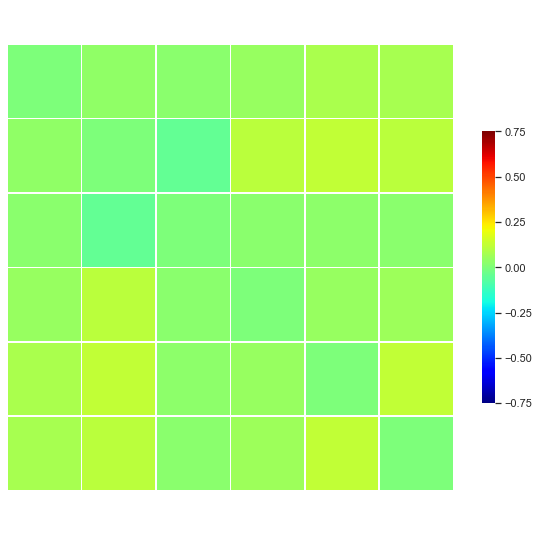

In [233]:
fnc = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\staticFC\stat\avgFNC\E_Avg.txt')
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(fnc, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square = True,linewidths=.5,cbar =True, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.hlines([11,18,27,45,58], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([11,18,27,45,58], *ax.get_xlim(), colors='black', linewidth=3)
myfig = heatmap.get_figure()

In [110]:
label_names =['DMN','SM','VIS','CC','SC','AUD']
fnc_diff= loadmat(r'H:\Matlab\Work\Age\ICA\Maconca\fnc_stats\S_C_p.mat')['t2'] 
# node_path = r'H:\Matlab\Software\conn\rois\atlas.txt'
# with open(node_path,"r") as file:
#     for num,line in enumerate(file.readlines()):
#         a = line.split(' ')[0].split('\t')[-1].strip('\n')
#         label_names.append(a)
#     file.close()
# # label_names = np.array(label_names[1:])
# len(label_names)

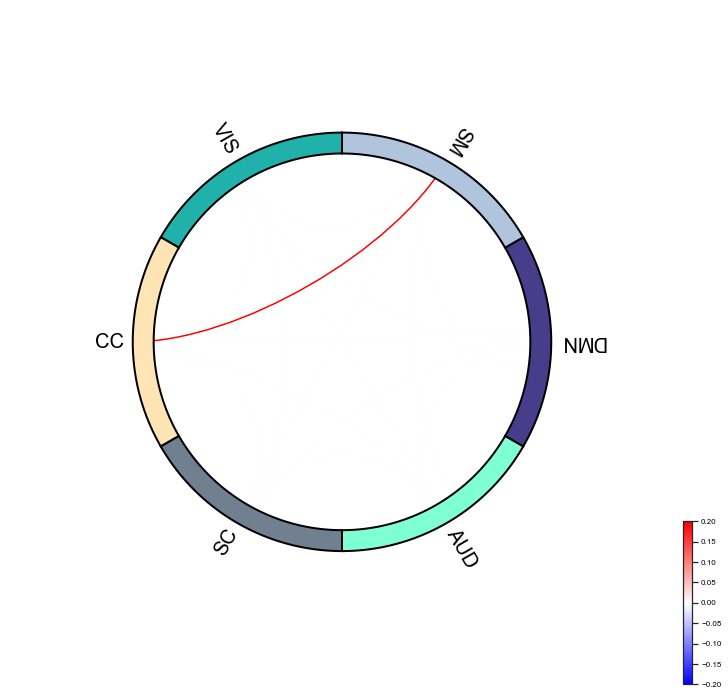

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


In [112]:
fig = plt.figure(num=None, figsize=(15, 15), facecolor='white')
myfig = plt.gcf()
color_can = ["darkslateblue","lightsteelblue",'LightSeaGreen','moccasin','SlateGray','Aquamarine','LightSkyBlue','YellowGreen']
net_num = [1,1,1,1,1,1] 
node_colors =[color_can[num]  for num, i in enumerate(net_num)  for j in range(i) ]
#node_colors = ["darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","lightsteelblue","lightsteelblue","lightsteelblue","moccasin","moccasin"]
plot_connectivity_circle(fnc_diff, label_names, node_colors=node_colors,colorbar= False,node_edgecolor="black",colormap="bwr",facecolor="white",textcolor="black", vmin=-0.2, vmax=0.2, n_lines=500, fontsize_names=20, fig=fig)
myfig.savefig("ICA100_FNC_withoutbar.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

In [209]:
SC_m.shape

(63, 63)

# FCM 36 into 6 domin

In [ ]:
label_names =['SM','DMN','AUD','VIS','CC','SC']
# node_path = r'H:\Matlab\Software\conn\rois\atlas.txt'
# with open(node_path,"r") as file:
#     for num,line in enumerate(file.readlines()):
#         a = line.split(' ')[0].split('\t')[-1].strip('\n')
#         label_names.append(a)
#     file.close()
# # label_names = np.array(label_names[1:])
# len(label_names)

# Network 32 

# State

In [132]:
centroid1  = loadmat(r'H:\Matlab\Work\Age\Preprocessed\Conn_Denosing\DynamicCluster\mat_cityblock_Kmeans_3\FNC_Centroid_1.mat')['centroid1']
# centroid1 = centroid1-np.diag(np.diag(centroid1));

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


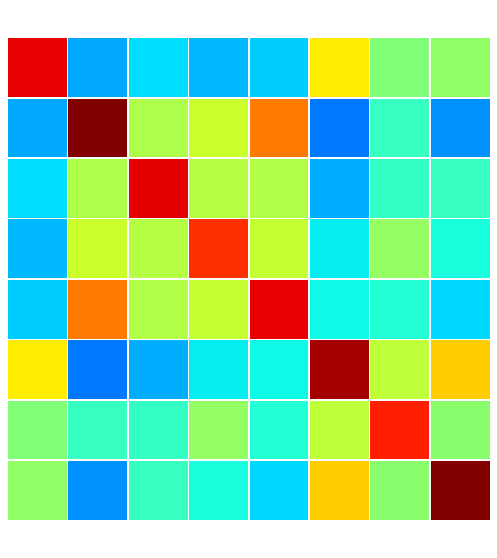

In [133]:
#########  FCN ################
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(centroid1, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square = True,linewidths=.5,cbar =False, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

myfig = heatmap.get_figure()
# ax.tick_params(labelsize=6)
# ax.hlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
# ax.vlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
# plt.show()

myfig.savefig("FNC_centroid1_withoutbar.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

In [126]:
centroid1  = loadmat(r'H:\Matlab\Work\Age\Preprocessed\Conn_Denosing\DynamicCluster\mat_cityblock_Kmeans_3\Centroid_1.mat')['DAT']
centroid1 = centroid1-np.diag(np.diag(centroid1));

In [19]:
# jet = cm.get_cmap('jet') 
# f, ax = plt.subplots(figsize=(10, 10))

# heatmap = sns.heatmap(centroid1, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
#             square = True,linewidths=.5,cbar= True,cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
# bottom, top = heatmap.get_ylim()
# heatmap.set_ylim(bottom + 0.5, top - 0.5)
# ax.tick_params(labelsize=5)
# ax.hlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
# ax.vlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)


# myfig =heatmap.get_figure()
# myfig.savefig("state1withoubar.png",bbox_inches='tight', pad_inches=0, dpi=300)
# myfig.show()

# static FC
## FCM

In [50]:
# Old_avg = np.loadtxt(r'H:\Matlab\Work\Age\Preprocessed\Conn_Denosing\AvgConn\avgConn2.txt')
network_lable_path = r'H:\Matlab\Software\conn\rois\networks.txt'
with open(network_lable_path) as f:
    label = f.readlines();
    print(label)
    labels = []
    for l in label:
        name = l.strip().split('.')[1].split(' ')
        print(name)
        if len(name)>2:
          labels.append(name[0]+name[1])
        else:
            labels.append(name[0])
            

['DefaultMode.MPFC (1,55,-3)\n', 'DefaultMode.LP (L) (-39,-77,33)\n', 'DefaultMode.LP (R) (47,-67,29)\n', 'DefaultMode.PCC (1,-61,38)\n', 'SensoriMotor.Lateral (L) (-55,-12,29)\n', 'SensoriMotor.Lateral (R) (56,-10,29)\n', 'SensoriMotor.Superior  (0,-31,67)\n', 'Visual.Medial (2,-79,12)\n', 'Visual.Occipital (0,-93,-4)\n', 'Visual.Lateral (L) (-37,-79,10)\n', 'Visual.Lateral (R) (38,-72,13)\n', 'Salience.ACC (0,22,35)\n', 'Salience.AInsula (L) (-44,13,1)\n', 'Salience.AInsula (R) (47,14,0)\n', 'Salience.RPFC (L) (-32,45,27)\n', 'Salience.RPFC (R) (32,46,27)\n', 'Salience.SMG (L) (-60,-39,31)\n', 'Salience.SMG (R) (62,-35,32)\n', 'DorsalAttention.FEF (L)  (-27,-9,64)\n', 'DorsalAttention.FEF (R)  (30,-6,64)\n', 'DorsalAttention.IPS (L)  (-39,-43,52)\n', 'DorsalAttention.IPS (R)  (39,-42,54)\n', 'FrontoParietal.LPFC (L)  (-43,33,28)\n', 'FrontoParietal.PPC (L)  (-46,-58,49)\n', 'FrontoParietal.LPFC (R)  (41,38,30)\n', 'FrontoParietal.PPC (R)  (52,-52,45)\n', 'Language.IFG (L) (-51,26,2)\

In [10]:
frame2 = pd.DataFrame(Old_avg,index=labels,columns=labels)

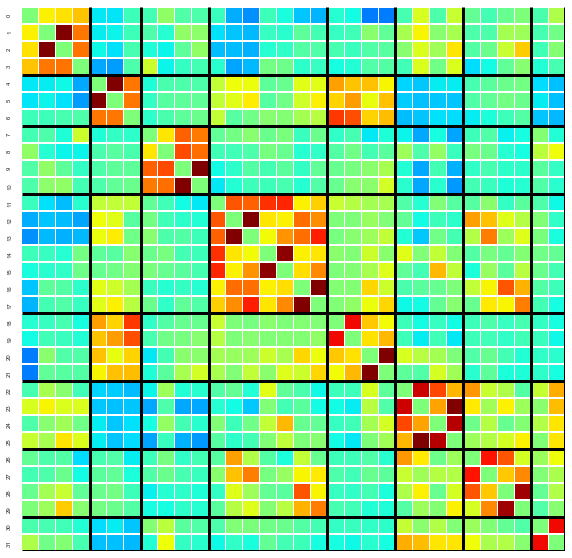

In [43]:
fnc = np.loadtxt(r'H:\Matlab\Work\Age\Preprocessed\Conn_Denosing\AvgFCMconn\avgAll.txt')
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(fnc, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square = True,linewidths=.5,cbar =False, cbar_kws={"shrink": .5},xticklabels=True, yticklabels=True)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.tick_params(labelsize=6)
ax.hlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
myfig = heatmap.get_figure()

# myfig =heatmap.get_figure()
# myfig.savefig("Net32_All_avg_SFC_withoutcbar.png",bbox_inches='tight', pad_inches=0, dpi=300)
# myfig.show()

# FCM significant difference 

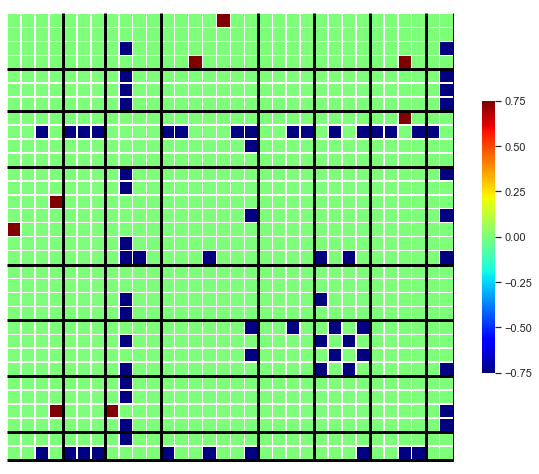

In [39]:
FCMsd = loadmat(r'H:\Matlab\Work\Age\Preprocessed\Conn_Denosing\AvgFCMconn\S_C_p.mat')['tvals2']
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(FCMsd, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square = True,linewidths=.5,cbar =True, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.tick_params(labelsize=6)
ax.hlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
myfig = heatmap.get_figure()


# fig = plt.figure(num=None, figsize=(15, 15), facecolor='white')
# myfig = plt.gcf()
# node_colors = ["darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","darkslateblue","lightsteelblue","lightsteelblue","lightsteelblue","moccasin","moccasin"]
# plot_connectivity_circle(SC_m, label_names, node_colors=node_colors,node_edgecolor="black",colormap="bwr",facecolor="white",textcolor="black", vmin=-0.2, vmax=0.2, n_lines=500, fontsize_names=15, title='Younger-to-elder Significant Connectivity', fig=fig)
# myfig.savefig("FNC6_sign_connectivity.png",bbox_inches='tight', pad_inches=0, dpi=300)
# myfig.show()

## FNC

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


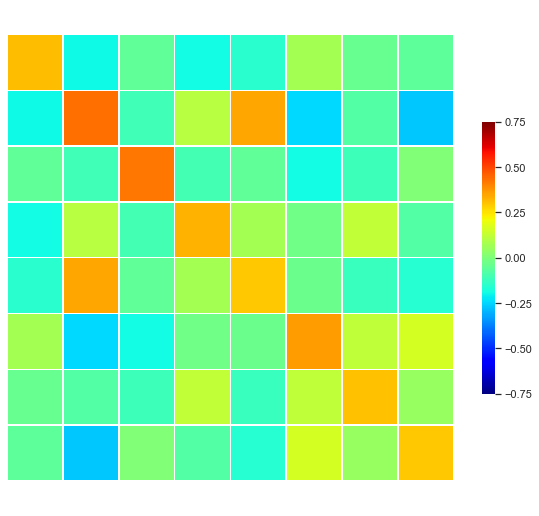

In [32]:
fnc = np.loadtxt(r'H:\Matlab\Work\Age\Preprocessed\Conn_Denosing\AvgFNCconn\E_Avg.txt')
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(fnc, cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square = True,linewidths=.5,cbar =True, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.hlines([11,18,27,45,58], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([11,18,27,45,58], *ax.get_xlim(), colors='black', linewidth=3)
myfig = heatmap.get_figure()

myfig =heatmap.get_figure()
myfig.savefig("Net32_Old_avg_SFNC.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

In [47]:
SC_m

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -1.],
       ...,
       [-0., -0., -0., ..., -0., -0., -1.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -1., -0., -0.]])

In [48]:
label_names =['DMN','SMN','VIS','SN','DAN','FPN','FPN','Cerebellar']

In [54]:
# label_names = ['SM','DMN','AUD','VIS','CC','SC']
color_can = ["darkslateblue","lightsteelblue",'LightSeaGreen','moccasin','SlateGray','Aquamarine','LightSkyBlue','YellowGreen']
net_num = [4,3,4,7,5,5,4,2]
node_colors =[color_can[num]  for num, i in enumerate(net_num)  for j in range(i) ]

In [55]:
node_colors

['darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'darkslateblue',
 'lightsteelblue',
 'lightsteelblue',
 'lightsteelblue',
 'LightSeaGreen',
 'LightSeaGreen',
 'LightSeaGreen',
 'LightSeaGreen',
 'moccasin',
 'moccasin',
 'moccasin',
 'moccasin',
 'moccasin',
 'moccasin',
 'moccasin',
 'SlateGray',
 'SlateGray',
 'SlateGray',
 'SlateGray',
 'SlateGray',
 'Aquamarine',
 'Aquamarine',
 'Aquamarine',
 'Aquamarine',
 'Aquamarine',
 'LightSkyBlue',
 'LightSkyBlue',
 'LightSkyBlue',
 'LightSkyBlue',
 'YellowGreen',
 'YellowGreen']

# DBC temporl feature 

In [168]:
a = ["Youger"]*34+["Elder"]*28
print(a)
dynamics = {}
dynamics['groupId'] = a

['Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Youger', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder', 'Elder']


In [1]:
f_state  = loadmat(r'H:\Matlab\Work\Age\DBC\Cluster_50\Dynamics\state_F.mat') # 'F_state'
MDT  = loadmat(r'H:\Matlab\Work\Age\DBC\Cluster_50\Dynamics\MDT.mat')     # 'MDT_state'
NT = loadmat(r'H:\Matlab\Work\Age\DBC\Cluster_50\Dynamics\NT_state.mat')  # 'NT_value'
TM  = loadmat(r'H:\Matlab\Work\Age\DBC\Cluster_50\Dynamics\TM_state.mat') # 'TM_state'

In [148]:
np.squeeze(np.squeeze(f_state['F_state'])[1]).shape
# np.squeeze(MDT['MDT_state'])[0]
# np.squeeze(NT['NT_value'])
# np.squeeze(TM['TM_state']).shape

(62,)

In [191]:
np.squeeze(np.squeeze(f_state['F_state'])[0])

array([0.15163934, 0.        , 0.71287129, 0.04918033, 0.        ,
       0.06779661, 0.        , 0.56903766, 0.51229508, 0.1352459 ,
       0.26794258, 0.64166667, 0.79918033, 0.46721311, 0.39130435,
       0.21256039, 0.64830508, 0.69262295, 0.38073394, 0.5625    ,
       0.02259887, 0.12608696, 0.33606557, 0.31967213, 0.36065574,
       0.55405405, 0.38916256, 0.59832636, 0.33606557, 0.63829787,
       0.31428571, 0.40425532, 0.08606557, 0.86440678, 0.47239264,
       0.37946429, 0.24154589, 0.68484848, 0.79638009, 0.367713  ,
       0.37267081, 0.57786885, 0.69583333, 0.55905512, 0.20212766,
       0.50697674, 0.34016393, 0.41891892, 0.25541126, 0.19262295,
       0.63186813, 0.38121547, 0.49107143, 0.32916667, 0.56837607,
       0.6557377 , 0.10648148, 0.37267081, 0.45652174, 0.30081301,
       0.06465517, 0.13215859])

In [195]:
states= np.concatenate([np.ones(62),np.ones(62)*2])
# states
groupid = ["Youger"]*34+["Elder"]*28+["Youger"]*34+["Elder"]*28
# groupid
f1 = np.squeeze(np.squeeze(f_state['F_state'])[0])
f2 = np.squeeze(np.squeeze(f_state['F_state'])[1])
fraction = np.concatenate([f1,f2])
mdt = np.concatenate([np.squeeze(np.squeeze(MDT['MDT_state'])[0]),np.squeeze(np.squeeze(MDT['MDT_state'])[1])])
nt = np.squeeze(np.squeeze(NT['NT_value']))
tm11 = np.squeeze(np.squeeze(TM['TM_state'])[0])

In [218]:
dynamics['f_state1'] = np.squeeze(np.squeeze(f_state['F_state'])[0])
dynamics['f_state2'] = np.squeeze(np.squeeze(f_state['F_state'])[1])
dynamics['MDT1'] = np.squeeze(np.squeeze(MDT['MDT_state'])[0])
dynamics['MDT2'] = np.squeeze(np.squeeze(MDT['MDT_state'])[1])
dynamics['NT'] = np.squeeze(np.squeeze(NT['NT_value']))
dynamics['TM11'] = np.squeeze(np.squeeze(TM['TM_state'])[0])
dynamics['TM12'] = np.squeeze(np.squeeze(TM['TM_state'])[1])
dynamics['TM21'] = np.squeeze(np.squeeze(TM['TM_state'])[2])
dynamics['TM22'] = np.squeeze(np.squeeze(TM['TM_state'])[3])

In [174]:
# dynamics_df = pd.DataFrame(dynamics)
# # dynamics.shape
dynamics_df[:5]

,groupId,f_state1,f_state2,MDT1,MDT2,NT,TM11,TM12,TM21,TM22
0,Youger,0.151639,0.848361,37.0,103.500000,2,0.972973,0.027027,0.004854,0.995146
1,Youger,0.000000,1.000000,0.0,233.000000,0,1.000000,0.000000,0.000000,1.000000
2,Youger,0.712871,0.287129,36.0,19.333333,6,0.979021,0.020979,0.051724,0.948276
3,Youger,0.049180,0.950820,6.0,116.000000,3,0.833333,0.166667,0.004329,0.995671
4,Youger,0.000000,1.000000,0.0,125.000000,0,1.000000,0.000000,0.000000,1.000000


In [210]:
# fraction_state
fraction_state = {}
fraction_state['Age'] = groupid
fraction_state['State'] =  states
fraction_state['Fraction'] = fraction
fraction_state = pd.DataFrame(fraction_state)

In [211]:
# mdt 
mdt_state = {}
mdt_state['Age'] = groupid
mdt_state['State'] =  states
mdt_state['MDT'] = mdt
mdt_state = pd.DataFrame(mdt_state)

In [224]:
tm_groupid = ["Youger"]*34+["Elder"]*28+["Youger"]*34+["Elder"]*28+ ["Youger"]*34+["Elder"]*28+["Youger"]*34+["Elder"]*28

In [226]:
len(tm_groupid)

248

In [231]:
# tm
tm11 = np.squeeze(np.squeeze(TM['TM_state'])[0])
tm12 = np.squeeze(np.squeeze(TM['TM_state'])[1])
tm21 = np.squeeze(np.squeeze(TM['TM_state'])[2])
tm22 = np.squeeze(np.squeeze(TM['TM_state'])[3])
tm = np.concatenate([tm11,tm12,tm21,tm22])
tm_state= ["TM11"]*62+["TM12"]*62+["TM21"]*62+["TM22"]*62
tm_plot = {}
tm_plot['Age'] = tm_groupid
tm_plot['TM_state'] = tm_state
tm_plot['TM'] = tm

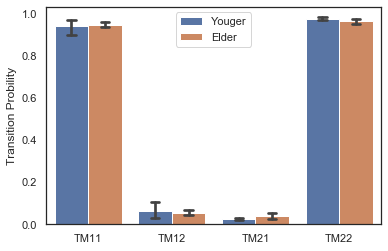

In [255]:
plt.figure()
sns.barplot(x="TM_state", y="TM",
            hue="Age",
            capsize=.1,
            #palette=["mistyrose", "salmon", "darkred"],
            #hue="Patient_status", kind="bar",  palette=["silver", "salmon", "darkred"],
            data= tm_plot)
plt.ylabel("Transition Probility")
plt.savefig(r"./Result/Plot/Dynamic_tempo/TM.png",bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

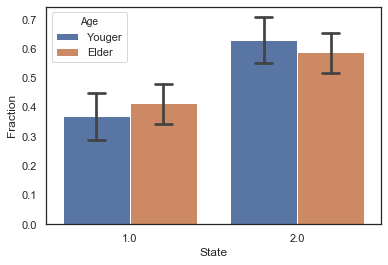

In [254]:
plt.figure()
sns.barplot(x="State", y="Fraction",
            hue="Age",
            capsize=.1,
            #palette=["mistyrose", "salmon", "darkred"],
            #hue="Patient_status",kind="bar",  palette=["silver", "salmon", "darkred"],
            data= fraction_state)
plt.savefig(r"./Result/Plot/Dynamic_tempo/Fraction.png",bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

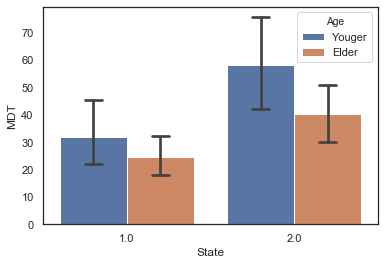

In [253]:
plt.figure()
sns.barplot(x="State", y="MDT",
            hue="Age",
            #palette=["mistyrose", "salmon", "darkred"],
            #hue="Patient_status",kind="bar",  palette=["silver", "salmon", "darkred"],
            capsize=.1,
            data= mdt_state)
plt.savefig(r"./Result/Plot/Dynamic_tempo/MDT.png",bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

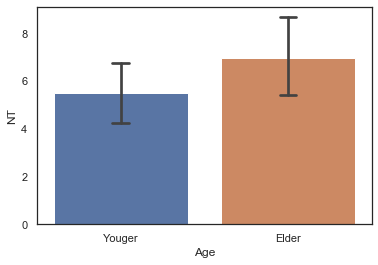

In [252]:
plt.figure()
sns.barplot(x= 'groupId', y= 'NT',
            #hue="Age",
            #palette=["mistyrose", "salmon", "darkred"],
            #hue="Patient_status",kind="bar",  palette=["silver", "salmon", "darkred"],
            capsize=.1,
            data= dynamics)
plt.xlabel("Age")
plt.ylabel("NT")
plt.savefig(r"./Result/Plot/Dynamic_tempo/NT.png",bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()